# Bank Customer Churn Prediction.

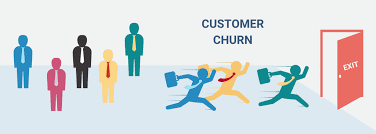

### About dataset:
###### The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. The dataset includes the following attributes:

1. Customer ID: A unique identifier for each customer

2. Surname: The customer's surname or last name

3. Credit Score: A numerical value representing the customer's credit score

4. Geography: The country where the customer resides (France, Spain or Germany)

5. Gender: The customer's gender (Male or Female)

6. Age: The customer's age.

7. Tenure: The number of years the customer has been with the bank

8. Balance: The customer's account balance

9. NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)

10. HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)

11. IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)

12. EstimatedSalary: The estimated salary of the customer

13. Exited: Whether the customer has churned (1 = yes, 0 = no)


The goal of the dataset is to predict which customers are likely to churn, based on the input features provided. The dataset can be used for classification tasks using various machine learning algorithms, such as logistic regression, random forest or neural networks. By predicting customer churn, banks can take appropriate measures to retain their customers and reduce customer turnover.


## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
import keras




import warnings
warnings.filterwarnings("ignore")

In [2]:
# color patettes
color_1 = sns.color_palette("Accent",10)
color_2 = sns.color_palette("mako_r",10)
color_3 = sns.color_palette("Spectral_r",10)
color_4 = sns.color_palette()


### Read dataset

In [3]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\python dataset\assiment\Churn_Modelling.csv")
df.head() ## head fuction are showing top 5 rows data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [4]:
## check the dataset shape
df.shape

(10002, 14)

In [5]:
## remove the unwanted columns

df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [6]:
# check the columns
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [7]:
# checking the duplicated values in data 
df.duplicated().sum()

2

In [8]:
# remove the duplicate values 
df = df.drop_duplicates()
df.duplicated().sum()

0

In [9]:
## checking the missing values 
df.isna().sum()

CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

## Missing values
how to deal with missing values, you have tree option.

1. Get rid of the missing data points
2. delete the mising values columns and row.
3. Set the values of some value( mean ,meadian, mode).

In [10]:
# checking the missing columns values then fill the null values 
print(df["Geography"].mode()[0])
print(df["Age"].median())
print(df["HasCrCard"].median())
print(df["IsActiveMember"].median())

France
37.0
1.0
1.0


In [11]:
## fill the missing values using the method (Mean,median,mode)
df["Geography"] = df["Geography"].fillna(df["Geography"].mode()[0])
df["Age"]= df["Age"].fillna(df["Age"].median())
df["HasCrCard"]=df["HasCrCard"].fillna(df["HasCrCard"].median())
df["IsActiveMember"] = df["IsActiveMember"].fillna(df["IsActiveMember"].median())

In [12]:
# check the after fill missing values
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
## chek the datatype details wise
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  float64
 8   IsActiveMember   10000 non-null  float64
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 937.5+ KB


#### Obsarvation:
1. Insight of dataset: it is 11 columns as types columns are float64(5), int64(4), object(2)

In [14]:
## checking the Age sum becouse i check the any float values 
df["Age"].sum()

389229.03

In [15]:
## change  dtype float to int
df["Age"] = df["Age"].astype(int)

In [16]:
## after change dtype 
df["Age"].sum()

389228

In [17]:
## after change dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int32  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  float64
 8   IsActiveMember   10000 non-null  float64
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(4), int32(1), int64(4), object(2)
memory usage: 898.4+ KB


## Getting the statistical summary of dataset

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.922800,10.487146,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


# Data Visualization

0    7963
1    2037
Name: Exited, dtype: int64


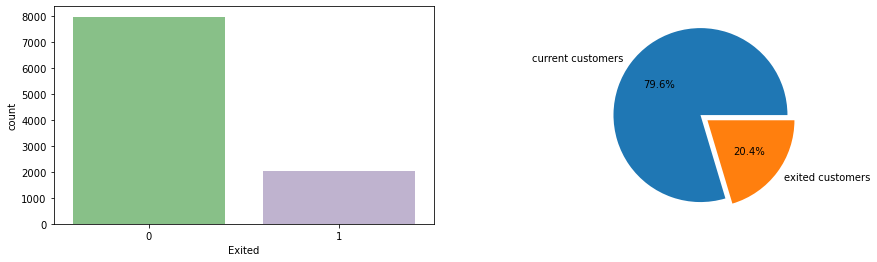

In [85]:
# find the the insight the exited columns and visualization using the countplot for seaborn and pie plot.
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(x=df["Exited"],palette=color_1)

plt.subplot(1,2,2)
plt.pie(df["Exited"].value_counts(),explode=[0.0,0.1],labels=["current customers","exited customers"],
        colors=color_4,autopct="%.01f%%")
print(df["Exited"].value_counts())


### Observation:
1. Insight of the exited columns : according to data actual exited customer are 2037 and percentage wise 20.4% of the customers are exited. 

Exited  Geography
0       France       4204
        Spain        2064
        Germany      1695
1       Germany       814
        France        810
        Spain         413
dtype: int64


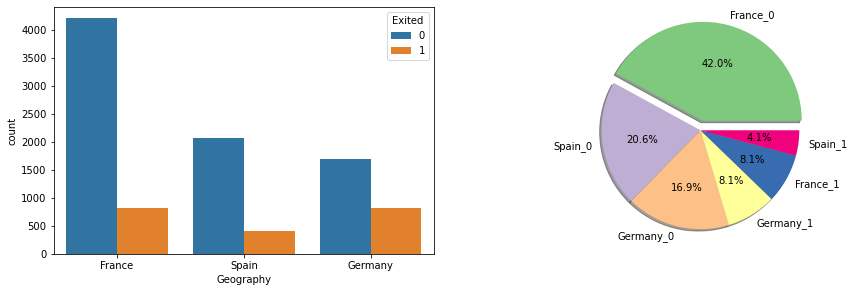

In [20]:
# find the insight and visualation plot wise 

label = ["France_0","Spain_0","Germany_0","Germany_1","France_1","Spain_1"]
eplode = [0.1,0.0,0.0,0.0,0.0,0.0]
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(df["Geography"],hue=df["Exited"],palette=color_4)
plt.subplot(2,2,2)
plt.pie(df[["Geography"]].groupby(df["Exited"]).value_counts(),explode=eplode,shadow=True,colors=color_1,
        labels=label,autopct="%0.1f%%")


print(df[["Geography"]].groupby(df["Exited"]).value_counts())


### Observation:
1. Insight of the Geography column: mostly customer are exited from Germany 8.1% and France 8.1% and Spain 4.1%.

Exited  Gender
0       Male      4559
        Female    3404
1       Female    1139
        Male       898
dtype: int64


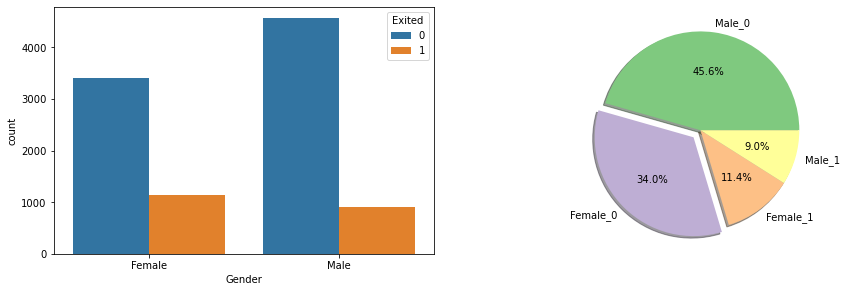

In [21]:
# find the insight and visualation plot wise 

label = ["Male_0","Female_0","Female_1","Male_1"]
eplode = [0.0,0.1,0.0,0.0]
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(df["Gender"],hue=df["Exited"],palette=color_4)
plt.subplot(2,2,2)
plt.pie(df[["Gender"]].groupby(df["Exited"]).value_counts(),explode=eplode,
        labels=label,colors=color_1,shadow=True,autopct="%0.1f%%")

print(df[["Gender"]].groupby(df["Exited"]).value_counts())


### Obsarvation:
1. Insight of the Gender column: mostly female customers are exited around 11.4% and male are exited around 9%.

Exited  NumOfProducts
0       2                4242
        1                3675
        3                  46
1       1                1409
        2                 348
        3                 220
        4                  60
dtype: int64
------------------------------
Exited  HasCrCard
0       1.0          5631
        0.0          2332
1       1.0          1424
        0.0           613
dtype: int64
------------------------------
Exited  IsActiveMember
0       1.0               4416
        0.0               3547
1       0.0               1302
        1.0                735
dtype: int64


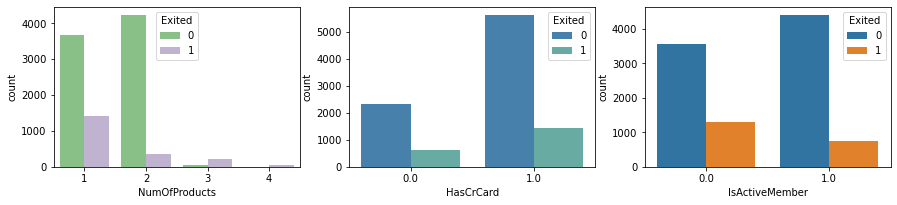

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.countplot(df["NumOfProducts"],hue=df["Exited"],palette=color_1)
plt.subplot(3,3,2)
sns.countplot(df["HasCrCard"],hue=df["Exited"],palette=color_3)
plt.subplot(3,3,3)
sns.countplot(df["IsActiveMember"],hue=df["Exited"],palette=color_4)


print(df[["NumOfProducts"]].groupby(df["Exited"]).value_counts())
print("--"*15)
print(df[["HasCrCard"]].groupby(df["Exited"]).value_counts())
print("--"*15)
print(df[["IsActiveMember"]].groupby(df["Exited"]).value_counts())

### Observation:
1. Insight of the NumOfProducts column: most of the 1 NumOfProducts customers are exited around 1409.
2. Insight of the HasCrCard column: most of the 1 HasCrCard customers are exited around 1424.
3. Insight of the IsActiveMember column: mostly 0 number of active member are exited around 1302. 

Exited  CreditScore
0       850            190
        678             50
1       850             43
0       684             43
        655             43
                      ... 
1       404              1
        405              1
        407              1
        408              1
0       405              1
Length: 862, dtype: int64


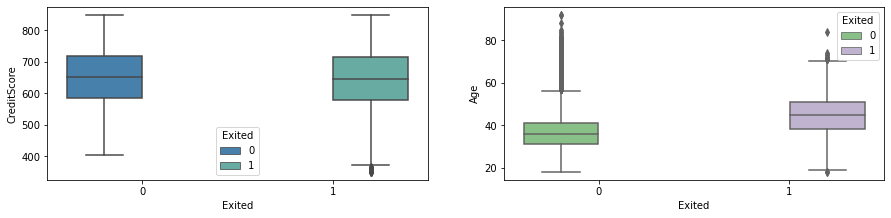

In [86]:

plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.boxplot(y=df["CreditScore"],x=df["Exited"],hue=df["Exited"],palette=color_3)
plt.subplot(2,2,2)
sns.boxplot(y=df["Age"],x=df["Exited"],hue=df["Exited"],palette=color_1)

print(df[["Exited","CreditScore"]].value_counts())



### Observation:
1. Insight of the CreditScore column: minimum of the 404 to max 850 CreditScore customers are exited.
2. Insight of the Age column: mostly minimum age 40 of range and maximum of the age 60 range are customers exited.

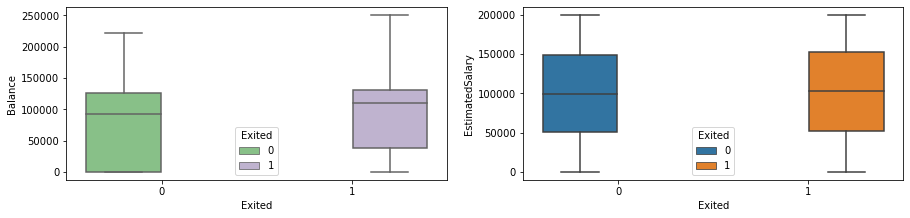

In [24]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.boxplot(y=df["Balance"],x=df["Exited"],hue=df["Exited"],palette=color_1)
plt.subplot(2,2,2)
sns.boxplot(y=df["EstimatedSalary"],x=df["Exited"],hue=df["Exited"],palette=color_4)
plt.show()

### Observation:

1. Insight of the Balance column: the range of minimum balance 50000 and  maximum balance of the 250000 customers are exited.
2. Insight of the EstimatedSalary column: mostly range of 25% EstimatedSalary 50000 above and maximum EstimatedSalary of the 250000 customers ares exited.

Exited  Tenure
0       7         851
        2         847
        8         828
        1         803
        5         803
        3         796
        4         786
        6         771
        9         771
        10        389
        0         318
1       1         232
        9         213
        3         213
        5         209
        4         203
        2         201
        8         197
        6         196
        7         177
        10        101
        0          95
dtype: int64


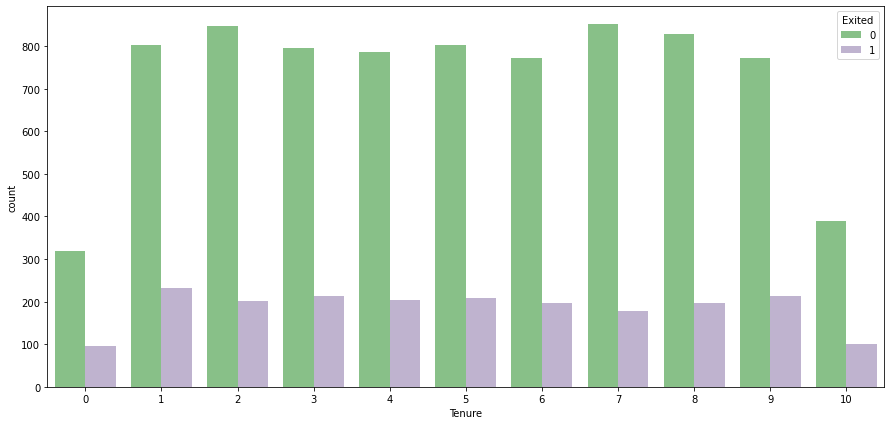

In [25]:
plt.figure(figsize=(15,7))
sns.countplot(df["Tenure"],hue=df["Exited"],palette=color_1)
print(df[["Tenure"]].groupby(df["Exited"]).value_counts())

## Observation:
1. insight of the Tenure column: the last 10 customers around 102 customerd are exited and 8,9 year old customer are around 213,197 exited.

## Exited customers dataset

In [26]:
exided_1 = df[df["Exited"]==1]
exided_1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1.0,1.0,101348.88,1
2,502,France,Female,42,8,159660.80,3,1.0,0.0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1.0,0.0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1.0,0.0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1.0,0.0,5097.67,1


In [27]:
## check the shape
exided_1.shape

(2037, 11)

In [28]:
# check the max customer balance 
exided_1["Balance"].max()

250898.09

In [29]:
# check the min customer balance 
exided_1["Balance"].min()

0.0

In [30]:
# check the max EstimatedSalary balance 
exided_1["EstimatedSalary"].max()

199808.1

In [31]:
# check the min EstimatedSalary balance 
exided_1["EstimatedSalary"].min()

11.58

max_account_balance 222267.63
----------------------------
min_account_balance 12459.19
----------------------------
CreditScore    676
Balance        676
dtype: int64


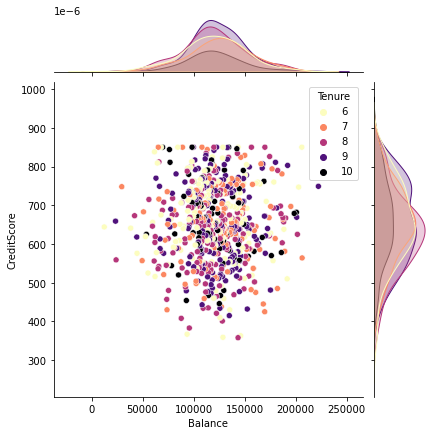

In [32]:
## customer are around 5 to 10 year old customets check the creditscore and current balance
five_to_ten_year_old_customers_Balance = exided_1[(exided_1["Tenure"]>5)& exided_1["Balance"]>0]
y = five_to_ten_year_old_customers_Balance.sort_values("Balance",ascending=False)["Balance"]
x = five_to_ten_year_old_customers_Balance.sort_values("Balance",ascending=False)["Tenure"]
credit_score = five_to_ten_year_old_customers_Balance.sort_values("Balance",ascending=False)["CreditScore"]

sns.jointplot(y=credit_score,x=y,hue=x,palette="magma_r")

print("max_account_balance",five_to_ten_year_old_customers_Balance["Balance"].max())
print("--"*14)
print("min_account_balance",five_to_ten_year_old_customers_Balance["Balance"].min())
print("--"*14)
print(five_to_ten_year_old_customers_Balance[["CreditScore","Balance"]].count())

### Observation:

1. The creditscore of range 600 to 700 are mostly customers exited, it is 5 to 10 year old customers exited.
2. The balance of the range is 100000 to 150000 mostly customers are exited, it is 5 to 10 year old customers exited. 

max_EstimatedSalary 199808.1
----------------------------
min_EstimatedSalary 91.75
----------------------------
total_count 884


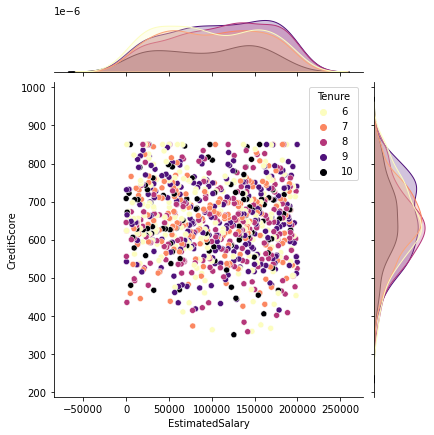

In [33]:
five_to_ten_year_old_customers_EstimatedSalary = exided_1[(exided_1["Tenure"]>5)& exided_1["EstimatedSalary"]>0]
y = five_to_ten_year_old_customers_EstimatedSalary.sort_values("EstimatedSalary",ascending=False)["EstimatedSalary"]
x = five_to_ten_year_old_customers_EstimatedSalary.sort_values("EstimatedSalary",ascending=False)["Tenure"]
credit_score = five_to_ten_year_old_customers_EstimatedSalary.sort_values("EstimatedSalary",ascending=False)["CreditScore"]

sns.jointplot(y=credit_score,x=y,hue=x,palette="magma_r")

print("max_EstimatedSalary",five_to_ten_year_old_customers_EstimatedSalary["EstimatedSalary"].max())
print("--"*14)
print("min_EstimatedSalary",five_to_ten_year_old_customers_EstimatedSalary["EstimatedSalary"].min())
print("--"*14)
print("total_count",five_to_ten_year_old_customers_EstimatedSalary["EstimatedSalary"].count())

### Observation:

1. The creditscore of range 600 to 700 are mostly customers exited, it is 5 to 10 year old customers exited.
2. The EstimatedSalary of the range is 115000 to 175000 mostly customers are exited, it is 5 to 10 year old customers exited.

## Visualizing the correlations between numerical variables

In [34]:
## creating a new df
df_new = df.copy()

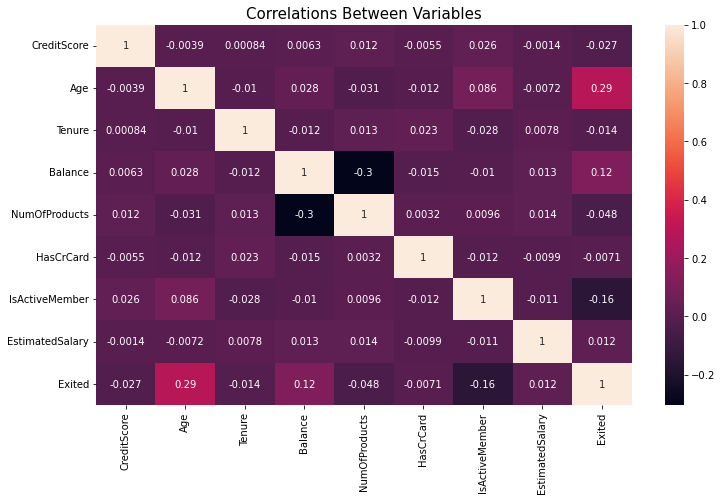

In [35]:
## visulation for correlation beetween variables
plt.figure(figsize=(12,7))
sns.heatmap(df_new.corr(),annot=True)
plt.title("Correlations Between Variables",size=15)
plt.show()

### observation:
1. Insight, the correlation is. The positive correlation shows is 0.02 to 0.1.

2. Insight, the correlation is. The negative correlation. It ranges from -0.02.

In [36]:
# cheking the values Geography columns
df_new["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [37]:
# cheking the values Gender columns
df_new["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

## Data preprocessing:
#### OrdinalEncoder method:

OrdinalEncoder is a preprocessing technique in machine learning that transforms categorical variables into ordinal integers, enabling algorithms to better understand and learn from categorical data

In [38]:
## Data preprocessing for OrdinalEncoder it is used by  convert the categriacal data to numbric data
from sklearn.preprocessing import OrdinalEncoder

a = ["Geography","Gender"] ## select the particalur columns for change the cate to numbric
en_ = OrdinalEncoder()     
df_new[a] = en_.fit_transform(df_new[a])


In [39]:
## encoding after check the columns
print(df_new["Geography"].value_counts())
print(df_new["Gender"].value_counts())

0.0    5014
1.0    2509
2.0    2477
Name: Geography, dtype: int64
1.0    5457
0.0    4543
Name: Gender, dtype: int64


In [40]:
## encoding after check the columns
df_new.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0.0,0.0,42,2,0.00,1,1.0,1.0,101348.88,1
1,608,2.0,0.0,41,1,83807.86,1,0.0,1.0,112542.58,0


In [41]:
# checking the columns
df_new.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

## Feature Scaling
Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization or standardization. Feature scaling is generally performed during the data pre-processing stage, before training models using machine learning algorithms.

In [42]:
## select the particalur columns for convert 0 to 1 using feature scaling method by sklearn.
b = ['CreditScore','Age', 'Tenure', 'Balance','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler

mix_scaler = MinMaxScaler()
df_new[b]= mix_scaler.fit_transform(df_new[b])

In [43]:
# after scaling
df_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,0.2,0.000000,1,1.0,1.0,0.506735,1
1,0.516,2.0,0.0,0.310811,0.1,0.334031,1,0.0,1.0,0.562709,0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,3,1.0,0.0,0.569654,1
3,0.698,0.0,0.0,0.283784,0.1,0.000000,2,0.0,0.0,0.469120,0
4,1.000,2.0,0.0,0.337838,0.2,0.500246,1,1.0,1.0,0.395400,0


## x,y spliting

In [44]:
x_1 = df_new.iloc[:,:-1]
y_1 = df_new["Exited"]
print(x_1)
print(y_1)

       CreditScore  Geography  Gender       Age  Tenure   Balance  \
0            0.538        0.0     0.0  0.324324     0.2  0.000000   
1            0.516        2.0     0.0  0.310811     0.1  0.334031   
2            0.304        0.0     0.0  0.324324     0.8  0.636357   
3            0.698        0.0     0.0  0.283784     0.1  0.000000   
4            1.000        2.0     0.0  0.337838     0.2  0.500246   
...            ...        ...     ...       ...     ...       ...   
9995         0.842        0.0     1.0  0.283784     0.5  0.000000   
9996         0.332        0.0     1.0  0.229730     1.0  0.228657   
9997         0.718        0.0     0.0  0.243243     0.7  0.000000   
9998         0.844        1.0     1.0  0.324324     0.3  0.299226   
10000        0.884        0.0     0.0  0.135135     0.4  0.518708   

       NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0                  1        1.0             1.0         0.506735  
1                  1        0.0      

## Scikit learn library has three main interfaces(API):

1. Estimators: Main and core interface of Scikit-learn. Shortly, we say that estimators are the classes which can learn and estimate some parameters of the data with the fit() method. All of the estimator’s hyperparameters are accessible directly via public instance variables. For example, Random forest algorithm is an estimator.


2. Transformers : Estimators which can also transform data with transform() or fit_transform() methods are called Transformers.


3. Predictors: Some estimators can also predict a value. For example we can predict quantities with the finalized regression model by calling the predict() and score() function on the finalized model.

## Train Test split

Partitioning data into training and testing subsets for model evaluation.

In [45]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_1,y_1,test_size=0.20,random_state=43)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8000, 10)
(8000,)
(2000, 10)
(2000,)


## ML and DL model building 
Model building in Machine Learning (ML) and Deep Learning (DL) involves selecting an appropriate algorithm or neural network architecture, training it on a dataset, and tuning the model to achieve optimal performance. This process requires expertise in data analysis, programming, and mathematics to develop accurate and effective models.


1. LogisticRegression

2. RandomForestClassifier

3. Neural Networks (NN)

## LogisticRegression
Logistic Regression is a statistical method used to analyze and model binary or categorical data, typically used for classification tasks in Machine Learning.

In [46]:
# Import the sklearn necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()
lr.fit(x_train,y_train)
rl_y_pred = lr.predict(x_test)
lr_y_predtrain = lr.predict(x_train)


from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score

print("Test_data")
print(confusion_matrix(y_test,rl_y_pred))
print(classification_report(y_test,rl_y_pred))



print("--"*15)
print("Train_data")
print(confusion_matrix(y_train,lr_y_predtrain))
print(classification_report(y_train,lr_y_predtrain))


Test_data
[[1547   41]
 [ 354   58]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      1588
           1       0.59      0.14      0.23       412

    accuracy                           0.80      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.80      0.75      2000

------------------------------
Train_data
[[6209  166]
 [1332  293]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      6375
           1       0.64      0.18      0.28      1625

    accuracy                           0.81      8000
   macro avg       0.73      0.58      0.59      8000
weighted avg       0.79      0.81      0.77      8000



In [47]:
# traindata and testdata scoring
lr_test_score  = lr.score(x_test,y_test)
lr_train_score = lr.score(x_train,y_train)

print("Test_data_score",lr_test_score)
print("Train_data_score",lr_train_score)

Test_data_score 0.8025
Train_data_score 0.81275


In [48]:
## roc and auc scores
rl_roc_auc_test = roc_auc_score(y_test,rl_y_pred)
rl_roc_auc_train = roc_auc_score(y_train,lr_y_predtrain)
print("Test_data_roc",round(rl_roc_auc_test,3))
print("Train_data_roc",round(rl_roc_auc_train,3))

Test_data_roc 0.557
Train_data_roc 0.577


## RandomForestClassifier
Random Forest Classifier is a type of ensemble learning algorithm that combines multiple decision trees to improve prediction accuracy and reduce overfitting. It is commonly used in classification tasks and can handle both numerical and categorical data.

In [49]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100,max_depth=2,random_state=0)

RF.fit(x_train,y_train)

RF_y_pred = RF.predict(x_test)

print(confusion_matrix(y_test,RF_y_pred))
print(classification_report(y_test,RF_y_pred))

[[1588    0]
 [ 385   27]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1588
           1       1.00      0.07      0.12       412

    accuracy                           0.81      2000
   macro avg       0.90      0.53      0.51      2000
weighted avg       0.85      0.81      0.73      2000



## Hyperparameter:
GridSearchCV is a hyperparameter tuning method used in Machine Learning to optimize the performance of a model by testing various combinations of hyperparameters. When applied to the Random Forest Classifier, GridSearchCV tests different combinations of parameters such as number of trees, maximum depth, and criterion, to determine the optimal set of parameters for the model.

In [50]:
## creating paramater
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features=["auto","sqrt"]
max_depth=[2,4]
min_samples_split=[2,5]
min_samples_leaf=[1,2]
bootstrap=[True,False]

In [51]:
## store the dict format
pram_grid = {"n_estimators":n_estimators,
            "max_features":max_features,
            "max_depth":max_depth,
            "min_samples_split":min_samples_split,
            "min_samples_leaf":min_samples_leaf,
            "bootstrap":bootstrap}

print(pram_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [52]:
# importing Gridsearchcv from sklearn labries
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(estimator=RandomForestClassifier(),param_grid=pram_grid,cv=3,verbose=2,n_jobs=4)


In [53]:
# fit dataset
grid_cv.fit(x_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [54]:
# best pramater are for random RandomForestClassifier 
grid_cv.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 10}

In [55]:
## apple GridSearchCV best_params_
RF_model = RandomForestClassifier(n_estimators=56,max_depth=4,
                            max_features="auto",
                            min_samples_split=2,
                            min_samples_leaf=1,
                            bootstrap=True,)

RF_model.fit(x_train,y_train)

LFP_y_pred = RF_model.predict(x_test)
LFP_y_pred_train= RF_model.predict(x_train)


print(confusion_matrix(y_test,LFP_y_pred))
print(classification_report(y_test,LFP_y_pred))

[[1566   22]
 [ 274  138]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1588
           1       0.86      0.33      0.48       412

    accuracy                           0.85      2000
   macro avg       0.86      0.66      0.70      2000
weighted avg       0.85      0.85      0.82      2000



In [56]:
grid_cv_train = grid_cv.score(x_train,y_train)
grid_cv_test = grid_cv.score(x_test,y_test)

print("Train_data",grid_cv_train)
print("Test_data",grid_cv_test)

Train_data 0.84625
Test_data 0.84


In [57]:
grid_cv_roc_test = roc_auc_score(y_test,LFP_y_pred)
grid_cv_roc_train = roc_auc_score(y_train,LFP_y_pred_train)
print("Test_data",round(grid_cv_roc_test,3))
print("Train_data",round(grid_cv_roc_train,3))

Test_data 0.661
Train_data 0.669


# Building Neural Network:
Building a neural network involves defining the network architecture, selecting appropriate activation functions, specifying the loss function, and training the model using backpropagation algorithm and stochastic gradient descent optimization.

In [58]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [59]:
nn = Sequential()

In [60]:
# Hidden Layer 1 along with inputs
nn.add(Dense(128,input_dim=x_train.shape[1],activation="relu"))
nn.add(Dropout(0.3)) # Dropout Layer 1
nn.add(Dense(64,activation="relu")) # Hidden Layer 2
nn.add(Dropout(0.3)) # Dropout Layer 2
nn.add(Dense(32,activation="relu")) # Hidden Layer 3
nn.add(Dropout(0.3)) # Dropout Layer 3
nn.add(Dense(1,activation="sigmoid"))

In [61]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [62]:
# Compile model
nn.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [63]:
# Fitting the model
hist = nn.fit(x_train,y_train,validation_split=0.20,epochs=100)

Epoch 1/100
200/200 [==============================] - 4s 9ms/step - loss: 0.5038 - accuracy: 0.7945 - val_loss: 0.4597 - val_accuracy: 0.7994
Epoch 2/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4711 - accuracy: 0.7972 - val_loss: 0.4372 - val_accuracy: 0.7994
Epoch 3/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4470 - accuracy: 0.8023 - val_loss: 0.4166 - val_accuracy: 0.8194
Epoch 4/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4307 - accuracy: 0.8159 - val_loss: 0.4036 - val_accuracy: 0.8275
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4094 - accuracy: 0.8264 - val_loss: 0.3774 - val_accuracy: 0.8531
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3985 - accuracy: 0.8344 - val_loss: 0.3709 - val_accuracy: 0.8500
Epoch 7/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3890 - accuracy: 0.8369 - val_loss: 0.3678 - val_accuracy: 0.8569

Epoch 58/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3301 - accuracy: 0.8633 - val_loss: 0.3438 - val_accuracy: 0.8662
Epoch 59/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3352 - accuracy: 0.8603 - val_loss: 0.3462 - val_accuracy: 0.8619
Epoch 60/100
200/200 [==============================] - 1s 7ms/step - loss: 0.3256 - accuracy: 0.8637 - val_loss: 0.3430 - val_accuracy: 0.8669
Epoch 61/100
200/200 [==============================] - 1s 7ms/step - loss: 0.3357 - accuracy: 0.8591 - val_loss: 0.3487 - val_accuracy: 0.8650
Epoch 62/100
200/200 [==============================] - 2s 8ms/step - loss: 0.3323 - accuracy: 0.8659 - val_loss: 0.3462 - val_accuracy: 0.8594
Epoch 63/100
200/200 [==============================] - 2s 8ms/step - loss: 0.3298 - accuracy: 0.8636 - val_loss: 0.3510 - val_accuracy: 0.8662
Epoch 64/100
200/200 [==============================] - 1s 7ms/step - loss: 0.3329 - accuracy: 0.8636 - val_loss: 0.3436 - val_accuracy:

### Visualise learning curve for the model

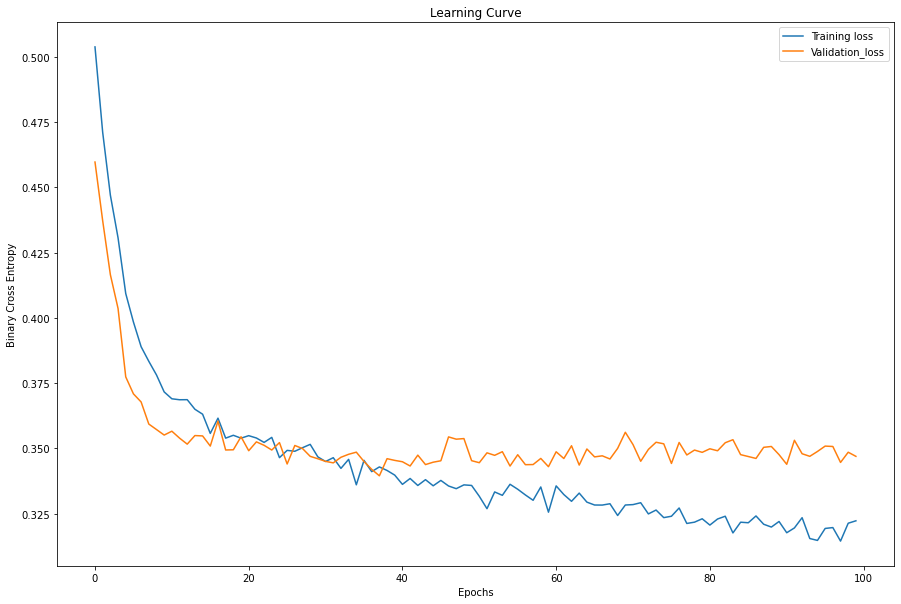

In [64]:
plt.figure(figsize=(15,10))
plt.plot(hist.history["loss"],label="Training loss")
plt.plot(hist.history["val_loss"],label="Validation_loss")
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy')
plt.title('Learning Curve')
plt.legend()
plt.show()

## Observation:

1. Accourding to lerning curve loss and val_loss near by error rate givig that it is best lerning score. 

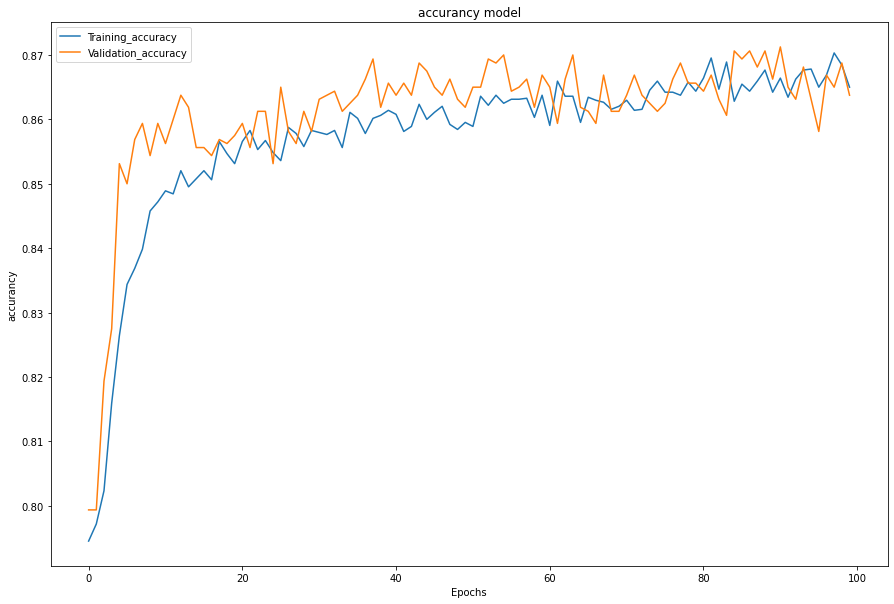

In [65]:
plt.figure(figsize=(15,10))
plt.plot(hist.history["accuracy"],label="Training_accuracy")
plt.plot(hist.history["val_accuracy"],label="Validation_accuracy")
plt.xlabel('Epochs')
plt.ylabel('accurancy')
plt.title('accurancy model')
plt.legend()
plt.show()

## Observation:

1. Accourding to accurancy_model: accurancy and val_accurancy near by accurancy score givig.

## Evaluate model

In [66]:
# use nn.evaluate for train data
nn.evaluate(x_train,y_train)

250/250 [==============================] - 1s 3ms/step - loss: 0.3000 - accuracy: 0.8773


[0.2999662458896637, 0.8772500157356262]

In [67]:
# use nn.evaluate for test data
nn.evaluate(x_test,y_test)

63/63 [==============================] - 1s 3ms/step - loss: 0.3561 - accuracy: 0.8565


[0.35608798265457153, 0.8565000295639038]

In [68]:
#Predict output probability
train_pred = nn.predict(x_train)
test_pred = nn.predict(x_test)

63/63 [==============================] - 0s 3ms/step


In [69]:
## cross check train_pred top 10
train_pred[:10]

array([[0.08234151],
       [0.1644147 ],
       [0.22740664],
       [0.01026706],
       [0.03453747],
       [0.07102142],
       [0.13787816],
       [0.00838878],
       [0.00768689],
       [0.5850719 ]], dtype=float32)

In [70]:
## cross check test_pred top 10 
test_pred[:10]

array([[0.16857632],
       [0.29390514],
       [0.1473854 ],
       [0.45801115],
       [0.27072904],
       [0.19685575],
       [0.23280844],
       [0.05225216],
       [0.01739425],
       [0.11790434]], dtype=float32)

In [71]:
## Predicting actual output class train_pred
threshold = 0.5
train_pred_class = []
for i in train_pred:
    if i >=0.5:
        train_pred_class.append(1)
    else:
        train_pred_class.append(0)

In [72]:
train_pred_class[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [73]:
## Predicting actual output class test_pred
threshold = 0.5
test_pred_class = []
for i in test_pred:
    if i >=0.5:
        test_pred_class.append(1)
    else:
        test_pred_class.append(0)

In [74]:
test_pred_class[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

# Evaluate using sklearn metrics

In [75]:
c_m = confusion_matrix(y_test,test_pred_class)
print(c_m)

[[1506   82]
 [ 205  207]]


<AxesSubplot:>

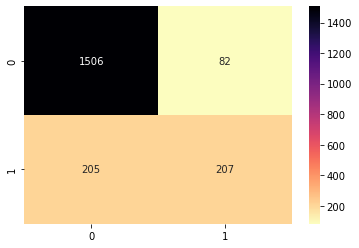

In [76]:
# Visualise use seaborn heatmap
sns.heatmap(c_m,annot=True,fmt='d',cmap="magma_r")

In [77]:
#classification_report
print(classification_report(y_test,test_pred_class))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1588
           1       0.72      0.50      0.59       412

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [78]:
nn_acc_test = accuracy_score(y_test,test_pred_class)
nn_acc_train = accuracy_score(y_train,train_pred_class)
print("Test_data",nn_acc_test)
print("Train_data",nn_acc_train)

Test_data 0.8565
Train_data 0.87725


In [79]:
## ROC AUC score
from sklearn.metrics import roc_auc_score

nn_roc_auc_test = roc_auc_score(y_test,test_pred_class)
nn_roc_auc_train = roc_auc_score(y_train,train_pred_class)
print("Test_data",round(nn_roc_auc_test,3))
print("Train_data",round(nn_roc_auc_train,3))

Test_data 0.725
Train_data 0.759


# Model Comparison

In [80]:
data = {"model_name":["LogisticRegression","RandomForestClassifier","Neural Networks (NN)"],
       "accuracy_test_data":[lr_test_score,grid_cv_test,nn_acc_test],
       "accuracy_train_data":[lr_train_score,grid_cv_train,nn_acc_train],
       "roc_auc_score_test_data":[rl_roc_auc_test,grid_cv_roc_test,nn_roc_auc_test],
       "roc_auc_score_train_data":[rl_roc_auc_train,grid_cv_roc_train,nn_roc_auc_train]}
data = pd.DataFrame(data)
data

,model_name,accuracy_test_data,accuracy_train_data,roc_auc_score_test_data,roc_auc_score_train_data
0,LogisticRegression,0.8025,0.81275,0.557479,0.577134
1,RandomForestClassifier,0.8400,0.84625,0.660549,0.669309
2,Neural Networks (NN),0.8565,0.87725,0.725395,0.759288


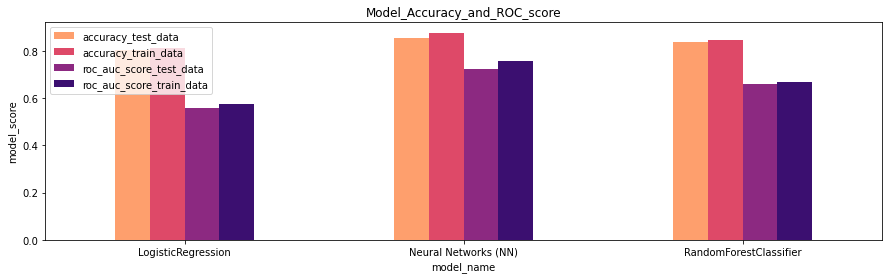

In [84]:
patt = sns.color_palette("magma_r",4)

pd.pivot_table(data=data,values=["accuracy_test_data",
                                 "accuracy_train_data",
                                 "roc_auc_score_test_data",
                                 "roc_auc_score_train_data"],
               index=["model_name"]).plot.bar(ylabel = "model_score",
                                              title="Model_Accuracy_and_ROC_score",color=patt,rot=0,figsize=(15,4))
plt.show()

# Observation:
1. Insight of the models for test_dataset: Neural Networks model is best accuracy giving that around 0.84 and roc score 0.72.